In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-nutrition/Indian_Food_Nutrition_Processed.csv


# Load the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the file 

In [3]:
df = pd.read_csv("/kaggle/input/indian-food-nutrition/Indian_Food_Nutrition_Processed.csv")

# 1. Dataset Overview

In [4]:
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dish Name          1014 non-null   object 
 1   Calories (kcal)    1014 non-null   float64
 2   Carbohydrates (g)  1014 non-null   float64
 3   Protein (g)        1014 non-null   float64
 4   Fats (g)           1014 non-null   float64
 5   Free Sugar (g)     1014 non-null   float64
 6   Fibre (g)          1014 non-null   float64
 7   Sodium (mg)        1014 non-null   float64
 8   Calcium (mg)       1014 non-null   float64
 9   Iron (mg)          1014 non-null   float64
 10  Vitamin C (mg)     932 non-null    float64
 11  Folate (µg)        932 non-null    float64
dtypes: float64(11), object(1)
memory usage: 95.2+ KB

Missing Values:
Dish Name             0
Calories (kcal)       0
Carbohydrates (g)     0
Protein (g)           0
Fats (g)              0
Free Sugar (g)  

## Summary statistics

In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Calories (kcal)  Carbohydrates (g)  Protein (g)     Fats (g)  \
count      1014.000000        1014.000000  1014.000000  1014.000000   
mean        233.735897          18.354004     4.753008    16.267584   
std         187.599467          16.745936     3.442746    20.452322   
min           6.610000           0.000000     0.000000     0.000000   
25%         101.180000           5.582500     2.100000     4.030000   
50%         174.920000          11.925000     3.990000     9.095000   
75%         315.845000          26.870000     6.602500    17.085000   
max         839.330000          86.530000    21.550000    90.450000   

       Free Sugar (g)    Fibre (g)   Sodium (mg)  Calcium (mg)    Iron (mg)  \
count     1014.000000  1014.000000   1014.000000   1014.000000  1014.000000   
mean         8.824832     1.962485    481.076755     59.877091     1.136953   
std         12.378324     2.771622   1750.646423     67.441463     1.520863   
min          0.000000  

# 2. High-Protein Dishes (Top 10)

In [6]:
high_protein_dishes = df.sort_values(by="Protein (g)", ascending=False).head(10)
print("\nTop 10 High-Protein Dishes:")
print(high_protein_dishes[["Dish Name", "Protein (g)", "Calories (kcal)", "Carbohydrates (g)", "Fats (g)"]])



Top 10 High-Protein Dishes:
                                              Dish Name  Protein (g)  \
683                                  Gun powder chutney        21.55   
539                                       Roast chicken        20.49   
849                                       Lemon chicken        20.20   
930                                   Maa chaane ki dal        19.80   
1013                Bengal 5 Spice Blend (Panch Phoran)        18.26   
850                                   Lemon butter fish        16.38   
222                                    Tandoori chicken        16.26   
551                                  Baked stuffed fish        16.14   
232                                          Fish tikka        16.00   
956   Cracked wheat and green gram dal premix (Dalia...        15.89   

      Calories (kcal)  Carbohydrates (g)  Fats (g)  
683            312.34              47.65      2.67  
539            199.90               0.10     13.06  
849            169.

# 3. Data Visualizations


##  3.1 Macronutrient distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


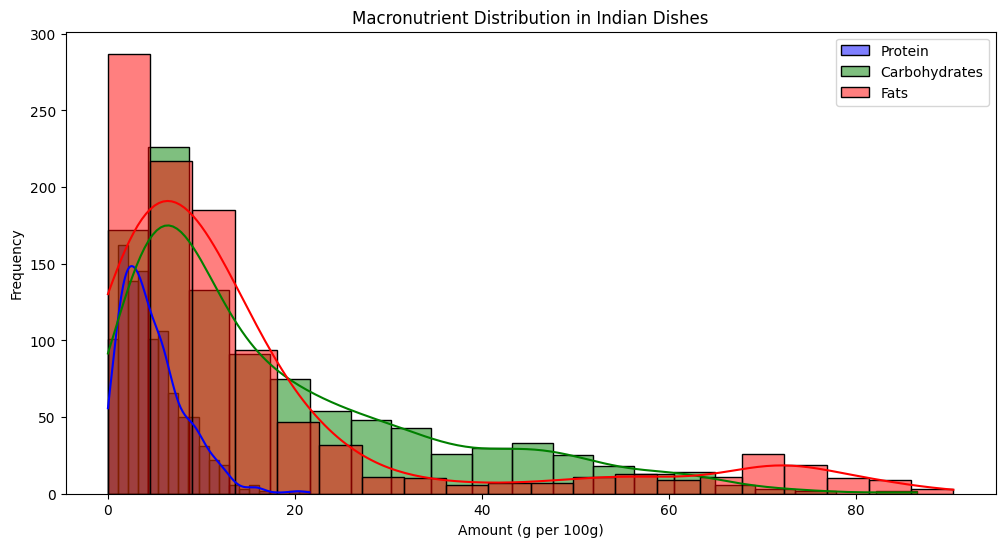

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Protein (g)"], bins=20, kde=True, color="blue", label="Protein")
sns.histplot(df["Carbohydrates (g)"], bins=20, kde=True, color="green", label="Carbohydrates")
sns.histplot(df["Fats (g)"], bins=20, kde=True, color="red", label="Fats")
plt.legend()
plt.title("Macronutrient Distribution in Indian Dishes")
plt.xlabel("Amount (g per 100g)")
plt.ylabel("Frequency")
plt.show()

##  3.2 Scatter plot: Protein vs Calories

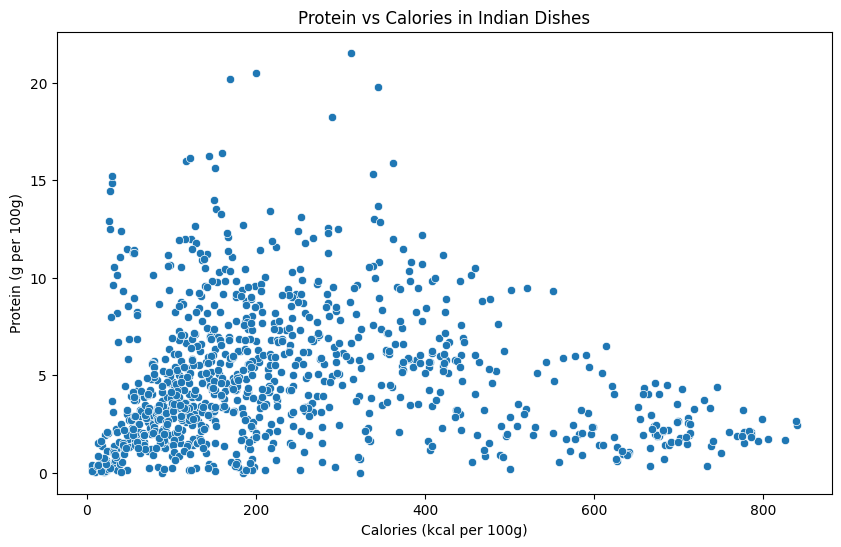

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Calories (kcal)"], y=df["Protein (g)"])
plt.title("Protein vs Calories in Indian Dishes")
plt.xlabel("Calories (kcal per 100g)")
plt.ylabel("Protein (g per 100g)")
plt.show()


## 3.3 Boxplot of protein content by category

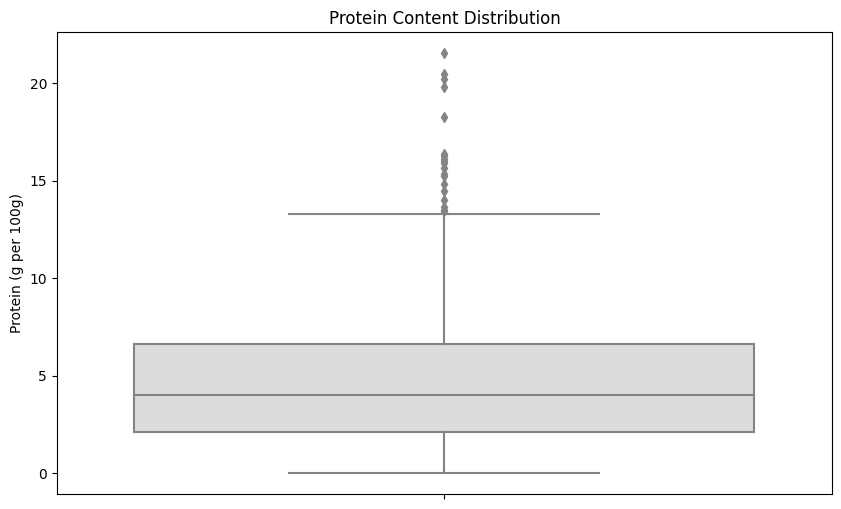

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["Protein (g)"], palette="coolwarm")
plt.title("Protein Content Distribution")
plt.ylabel("Protein (g per 100g)")
plt.show()

## 3.4 Heatmap of nutrient correlations

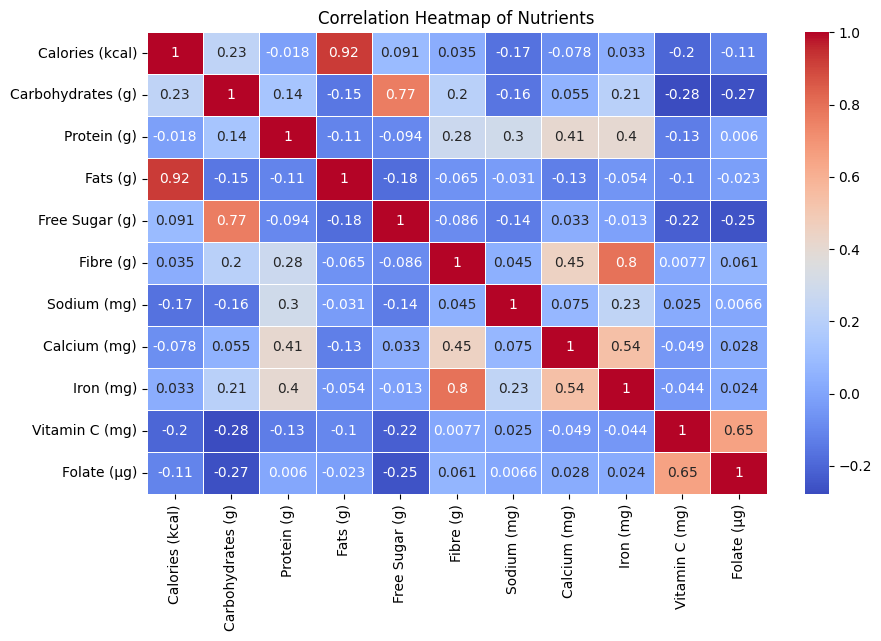

In [10]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Nutrients")
plt.show()

## 3.5 Bar chart of top 10 high-calorie dishes

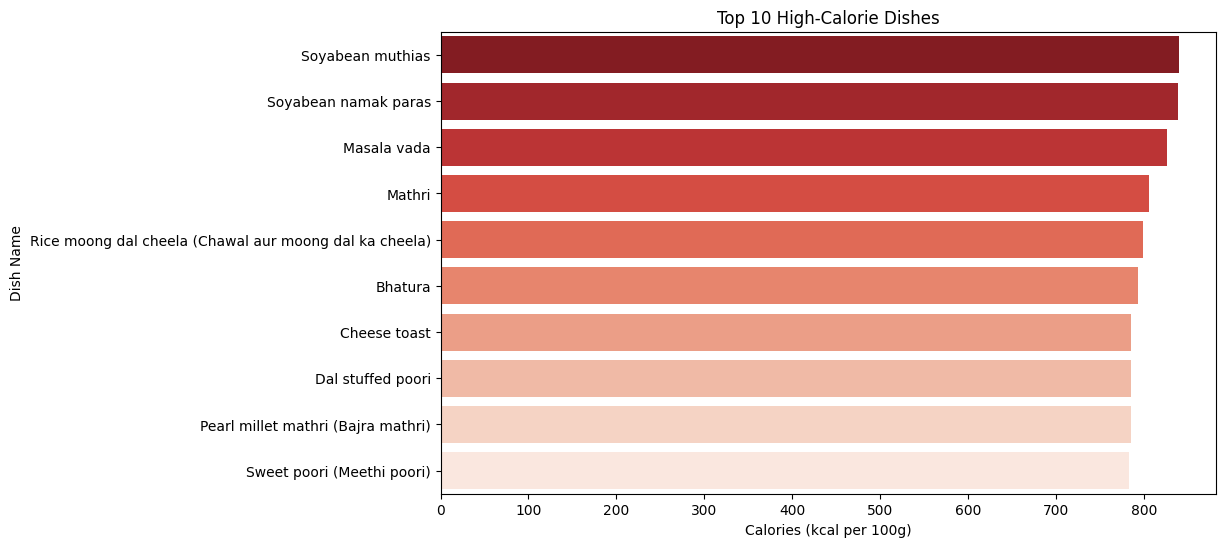

In [11]:
top_calories = df.sort_values(by="Calories (kcal)", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_calories["Dish Name"], x=top_calories["Calories (kcal)"], palette="Reds_r")
plt.title("Top 10 High-Calorie Dishes")
plt.xlabel("Calories (kcal per 100g)")
plt.ylabel("Dish Name")
plt.show()

## 3.6 Line plot of protein vs fats for top 20 dishes

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

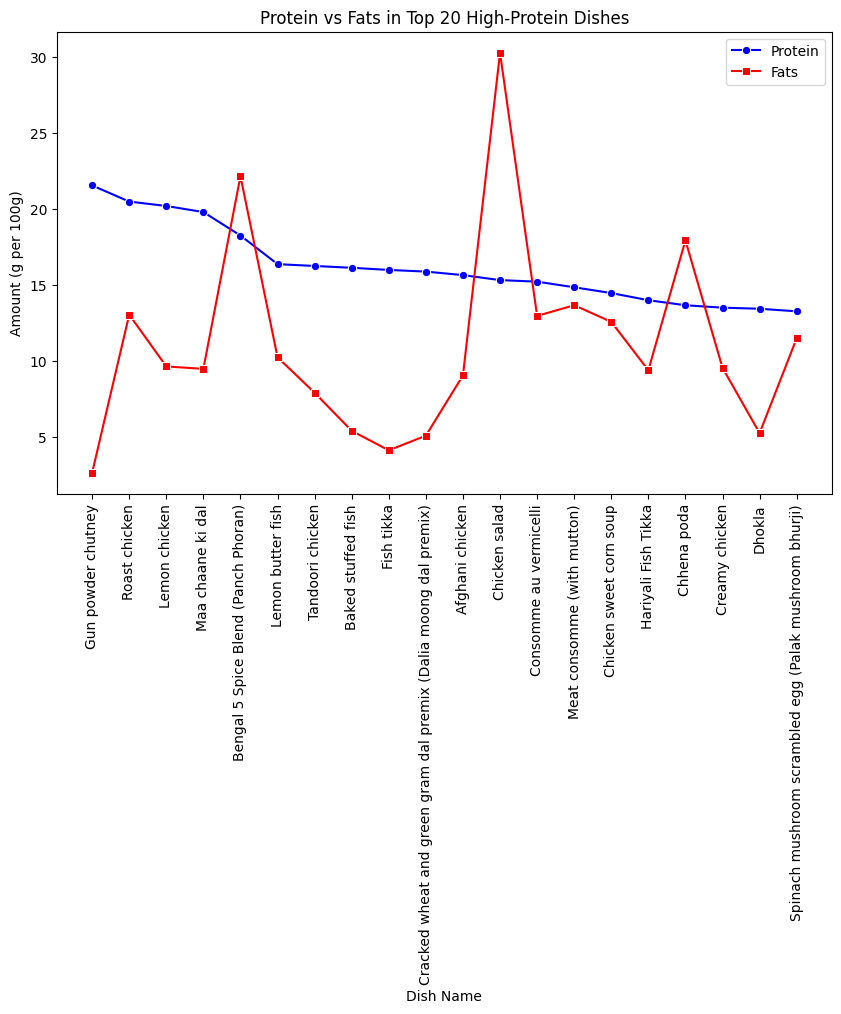

In [12]:
top_20_protein = df.sort_values(by="Protein (g)", ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.lineplot(x=top_20_protein["Dish Name"], y=top_20_protein["Protein (g)"], marker="o", label="Protein", color="blue")
sns.lineplot(x=top_20_protein["Dish Name"], y=top_20_protein["Fats (g)"], marker="s", label="Fats", color="red")
plt.legend()
plt.title("Protein vs Fats in Top 20 High-Protein Dishes")
plt.xlabel("Dish Name")
plt.ylabel("Amount (g per 100g)")
plt.xticks(rotation=90)
plt.show()

### **Conclusion**

Through this exploratory data analysis (EDA), we examined key nutritional insights from Indian food items using six visualizations:

1. **Macronutrient Distribution** – Showed the spread of protein, carbohydrates, and fats, helping to identify foods rich in specific macronutrients.
2. **Protein vs. Calories Scatter Plot** – Revealed the relationship between protein content and calorie density, useful for identifying high-protein, low-calorie foods.
3. **Protein Content by Food Category** – Highlighted variations in protein levels across different food types, helping in dietary categorization.
4. **Heatmap of Nutrient Correlations** – Displayed how different nutrients correlate with each other, providing insights into nutritional patterns.
5. **Top High-Calorie Dishes** – Provided insights into the most energy-dense foods, useful for individuals tracking caloric intake.
6. **Protein vs Fats for Top 20 Dishes** – Compared protein and fat content in the top 20 high-protein dishes, aiding in nutritional balance considerations.

These visualizations offer valuable insights into the nutritional composition of Indian foods, aiding both fitness-conscious individuals and those looking to maintain a balanced diet. Further analysis can explore more granular dietary trends or specific health-related aspects.
"""